In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 도미 데이터 선형회귀

In [2]:
# 도미 데이터 준비
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 길이 무게 묶어주기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

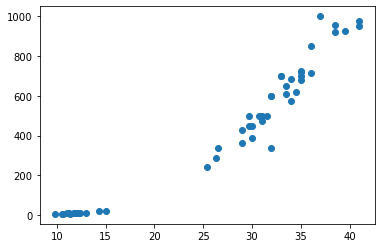

In [4]:
plt.scatter(length, weight)

In [5]:
# 최소제곱법

In [6]:
meanl = np.mean(length)
meanw = np.mean(weight)

In [7]:
# 분모
difflen = sum([(i-meanl)**2 for i in length])
print('분모:', difflen)

분모: 5035.921224489796


In [8]:
# 분자
lw = [[l,w] for l,w in zip(length,weight)]
difflw = sum([(i-meanl)*(j-meanw) for i,j in lw])
print('분자:', difflw)

분자: 154935.76


In [9]:
a = difflw / difflen
b = (meanw - meanl*a)

In [10]:
print('기울기 a = ',a)
print('y절편 b = ',b)

기울기 a =  30.766120654656785
y절편 b =  -387.88053371180604


In [11]:
leng = [i[0] for i in lw]
we = [i[1] for i in lw]

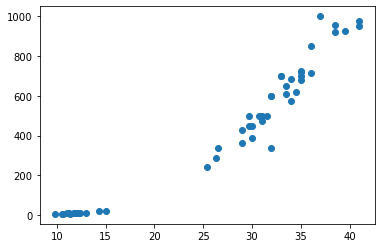

In [12]:
plt.scatter(leng, we)

In [13]:
# 넘파이 배열로 변환
len_np = np.array(leng)
we_np = np.array(we)
print(len_np)

[25.4 26.3 26.5 29.  29.  29.7 29.7 30.  30.  30.7 31.  31.  31.5 32.
 32.  32.  33.  33.  33.5 33.5 34.  34.  34.5 35.  35.  35.  35.  36.
 36.  37.  38.5 38.5 39.5 41.  41.   9.8 10.5 10.6 11.  11.2 11.3 11.8
 11.8 12.  12.2 12.4 13.  14.3 15. ]


In [28]:
# 회귀직선에 따른 예측값
predict_we = (a * len_np) + b

array([393.57893092, 421.26843951, 427.42166364, 504.33696527,
       504.33696527, 525.87324973, 525.87324973, 535.10308593,
       535.10308593, 556.63937039, 565.86920658, 565.86920658,
       581.25226691, 596.63532724, 596.63532724, 596.63532724,
       627.40144789, 627.40144789, 642.78450822, 642.78450822,
       658.16756855, 658.16756855, 673.55062887, 688.9336892 ,
       688.9336892 , 688.9336892 , 688.9336892 , 719.69980986,
       719.69980986, 750.46593051, 796.61511149, 796.61511149,
       827.38123215, 873.53041313, 873.53041313, -86.3725513 ,
       -64.83626684, -61.75965477, -49.45320651, -43.29998238,
       -40.22337031, -24.84030999, -24.84030999, -18.68708586,
       -12.53386172,  -6.38063759,  12.0790348 ,  52.07499165,
        73.61127611])

In [27]:
# 회귀직선에 예측값 따른 오차
err = we_np - predict_we

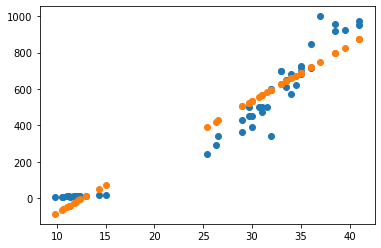

In [15]:
plt.scatter(leng, we)
plt.scatter(leng, predict_we)
plt.show()

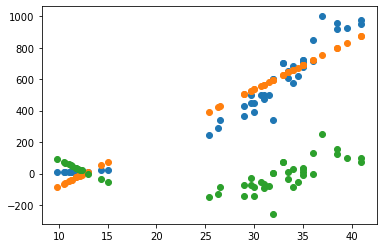

In [20]:
plt.scatter(leng, we)
plt.scatter(leng, predict_we)
plt.scatter(leng, err)
plt.show()

In [24]:
for i in range(len(leng)):
    print("%.f번째"%i, "길이=", leng[i], "무게=", we[i] , "예측무게=", predict_we[i], "오차=", err[i])

0번째 길이= 25.4 무게= 242.0 예측무게= 393.5789309164762 오차= -151.57893091647622
1번째 길이= 26.3 무게= 290.0 예측무게= 421.2684395056674 오차= -131.2684395056674
2번째 길이= 26.5 무게= 340.0 예측무게= 427.42166363659874 오차= -87.42166363659874
3번째 길이= 29.0 무게= 363.0 예측무게= 504.3369652732407 오차= -141.3369652732407
4번째 길이= 29.0 무게= 430.0 예측무게= 504.3369652732407 오차= -74.33696527324071
5번째 길이= 29.7 무게= 450.0 예측무게= 525.8732497315004 오차= -75.87324973150044
6번째 길이= 29.7 무게= 500.0 예측무게= 525.8732497315004 오차= -25.873249731500437
7번째 길이= 30.0 무게= 390.0 예측무게= 535.1030859278975 오차= -145.1030859278975
8번째 길이= 30.0 무게= 450.0 예측무게= 535.1030859278975 오차= -85.1030859278975
9번째 길이= 30.7 무게= 500.0 예측무게= 556.6393703861572 오차= -56.639370386157225
10번째 길이= 31.0 무게= 475.0 예측무게= 565.8692065825543 오차= -90.86920658255428
11번째 길이= 31.0 무게= 500.0 예측무게= 565.8692065825543 오차= -65.86920658255428
12번째 길이= 31.5 무게= 500.0 예측무게= 581.2522669098827 오차= -81.25226690988268
13번째 길이= 32.0 무게= 340.0 예측무게= 596.6353272372111 오차= -256.6353272372111
14번째 길이= 32.0

# fish data 다중회귀분석 실습

In [29]:
import pandas as pd

In [31]:
fish = pd.read_csv('fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
